"""
# Data Exploration

This notebook explores the scraped data and provides insights into patterns, 
distributions, and characteristics of Sri Lankan news and social media data.
"""

### 1. Setup and Imports

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent / 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Load configuration

In [2]:
from config import RAW_DATA_DIR, PROCESSED_DATA_DIR
from preprocessing.text_cleaner import TextCleaner
from models.sentiment_engine import SentimentAnalyzer

print("✓ Imports successful")

✓ Imports successful


### 2. Load Raw Data

### Find the most recent news data file

In [ ]:
news_files = list(RAW_DATA_DIR.glob('news_*.json'))
if news_files:
    latest_file = max(news_files, key=lambda x: x.stat().st_mtime)
    print(f"Loading: {latest_file}")
    
    with open(latest_file, 'r', encoding='utf-8') as f:
        news_data = json.load(f)
    
    df = pd.DataFrame(news_data)
    df['scraped_at'] = pd.to_datetime(df['scraped_at'])
    df['published_date'] = pd.to_datetime(df['published_date'])
    
    print(f"\n Loaded {len(df)} articles")
    print(f"Date range: {df['scraped_at'].min()} to {df['scraped_at'].max()}")
else:
    print(" No data files found. Run the scraper first: python src/data_ingestion/news_scraper.py")
    # Create sample data for demonstration
    df = pd.DataFrame({
        'title': [f'Sample article {i}' for i in range(100)],
        'source': np.random.choice(['Ada Derana', 'Daily Mirror', 'Hiru News'], 100),
        'category': np.random.choice(['Political', 'Economic', 'Social'], 100),
        'language': np.random.choice(['en', 'si'], 100),
        'scraped_at': pd.date_range(end=datetime.now(), periods=100, freq='1H')
    })
    print(" Created sample data for demonstration")

⚠️  No data files found. Run the scraper first: python src/data_ingestion/news_scraper.py
✓ Created sample data for demonstration


### 3. Basic Statistics

In [4]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Total articles: {len(df)}")
print(f"Date range: {(df['scraped_at'].max() - df['scraped_at'].min()).days} days")
print(f"Unique sources: {df['source'].nunique()}")
print(f"Categories: {df['category'].nunique()}")
print(f"Languages: {df['language'].value_counts().to_dict()}")
print("="*60)

DATASET OVERVIEW
Total articles: 100
Date range: 4 days
Unique sources: 3
Categories: 3
Languages: {'si': 58, 'en': 42}


In [5]:
# Display first few rows
df.head()

,title,source,category,language,scraped_at
0,Sample article 0,Hiru News,Social,si,2025-11-29 09:03:44.928991
1,Sample article 1,Ada Derana,Political,en,2025-11-29 10:03:44.928991
2,Sample article 2,Hiru News,Economic,en,2025-11-29 11:03:44.928991
3,Sample article 3,Hiru News,Social,si,2025-11-29 12:03:44.928991
4,Sample article 4,Hiru News,Economic,si,2025-11-29 13:03:44.928991


### 4. Source Distribution

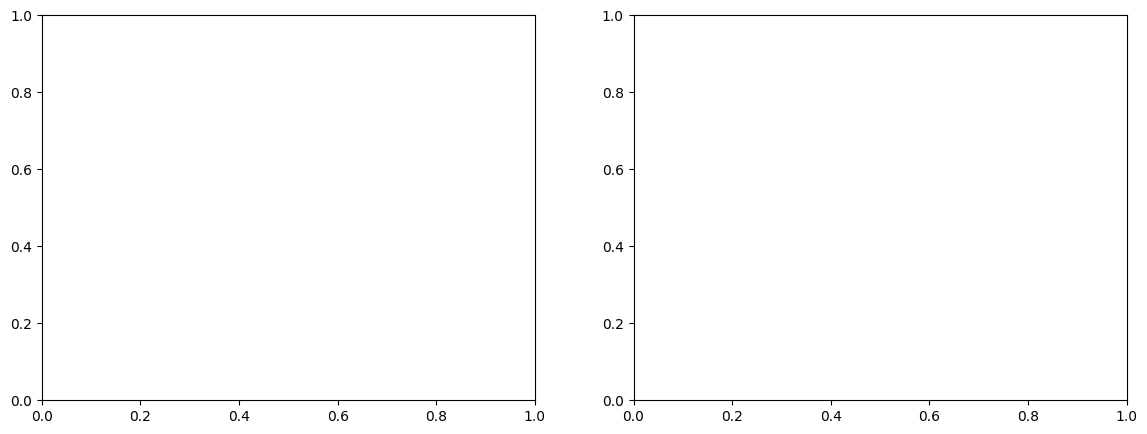

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [7]:
# Articles by source
source_counts = df['source'].value_counts()
axes[0].bar(source_counts.index, source_counts.values, color='steelblue')
axes[0].set_title('Articles by Source', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Number of Articles')
axes[0].tick_params(axis='x', rotation=45)

In [ ]:
# Percentage distribution
axes[1].pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Source Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(Path.cwd().parent / 'data' / 'processed' / 'source_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSource analysis complete")

<Figure size 640x480 with 0 Axes>


✓ Source analysis complete


### 5. Category Analysis

Text(0, 0.5, 'Category')

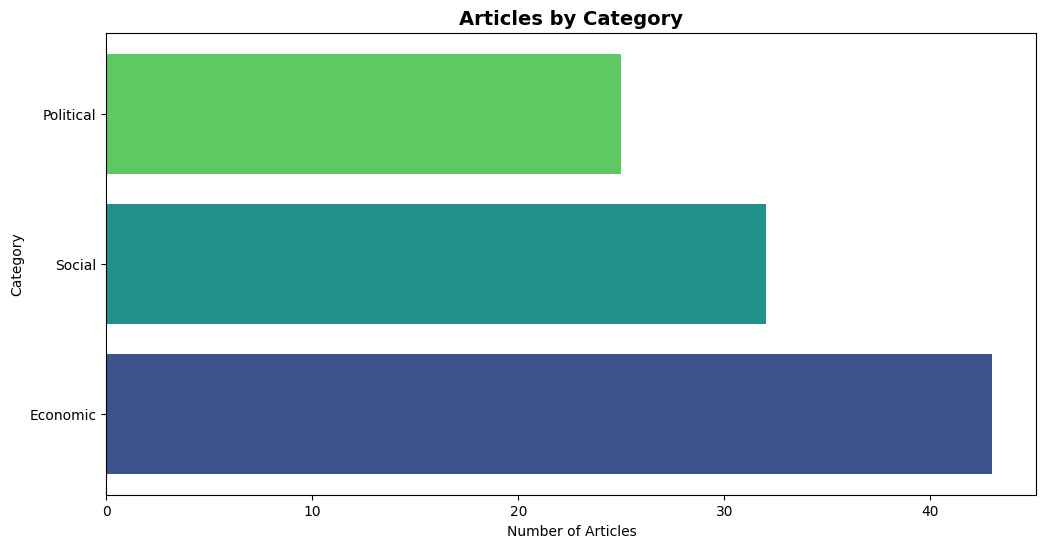

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

category_counts = df['category'].value_counts()
bars = ax.barh(category_counts.index, category_counts.values, color=sns.color_palette('viridis', len(category_counts)))

ax.set_title('Articles by Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Articles')
ax.set_ylabel('Category')

In [ ]:
# Add value labels
for i, (cat, count) in enumerate(zip(category_counts.index, category_counts.values)):
    ax.text(count, i, f' {count}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig(Path.cwd().parent / 'data' / 'processed' / 'category_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCategory analysis complete")

<Figure size 640x480 with 0 Axes>


✓ Category analysis complete


### 6. Temporal Patterns

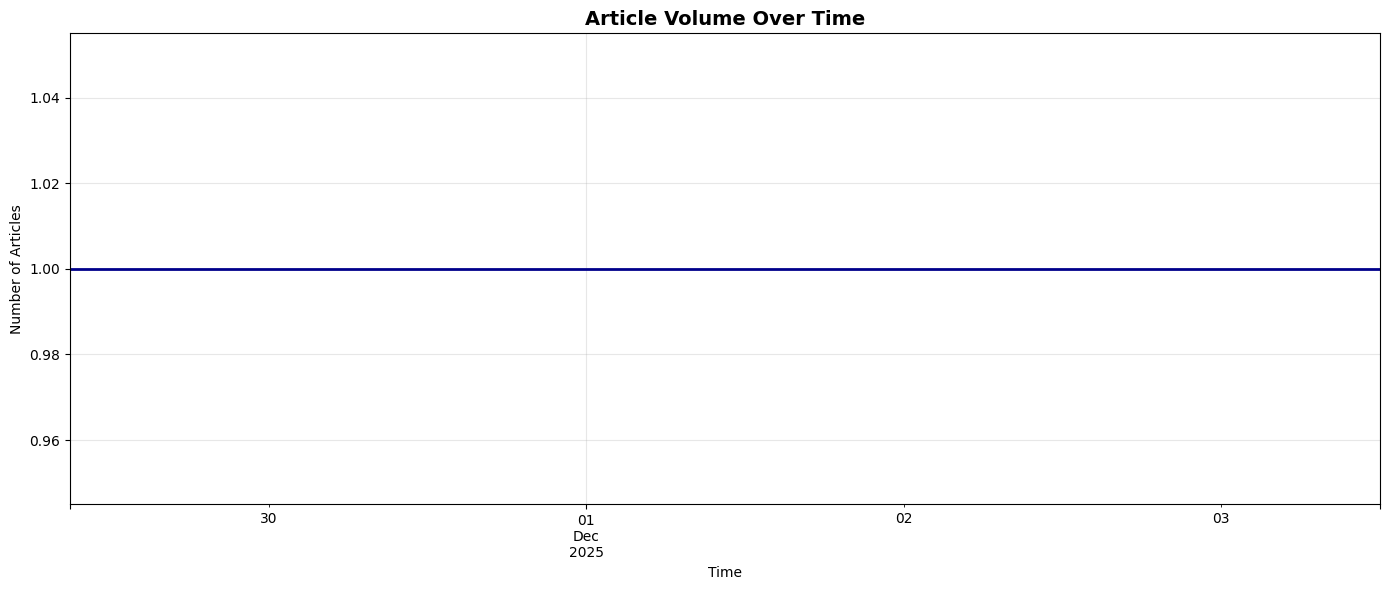


✓ Temporal analysis complete


In [ ]:
# Articles over time
df_hourly = df.set_index('scraped_at').resample('1H').size()

fig, ax = plt.subplots(figsize=(14, 6))
df_hourly.plot(ax=ax, linewidth=2, color='darkblue')
ax.set_title('Article Volume Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('Number of Articles')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(Path.cwd().parent / 'data' / 'processed' / 'temporal_pattern.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Temporal analysis complete")

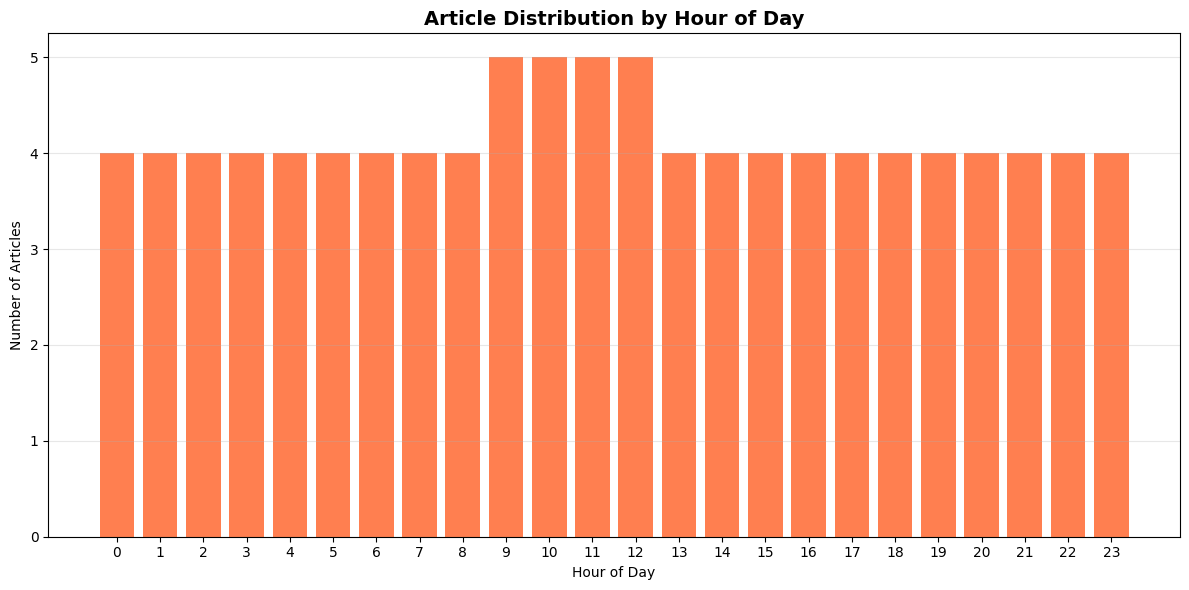


✓ Hourly pattern analysis complete


In [ ]:
# Hour of day distribution
if 'scraped_at' in df.columns:
    df['hour'] = df['scraped_at'].dt.hour
    
    fig, ax = plt.subplots(figsize=(12, 6))
    hour_counts = df['hour'].value_counts().sort_index()
    ax.bar(hour_counts.index, hour_counts.values, color='coral')
    ax.set_title('Article Distribution by Hour of Day', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Number of Articles')
    ax.set_xticks(range(24))
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print("\n Hourly pattern analysis complete")

### 7. Text Analysis

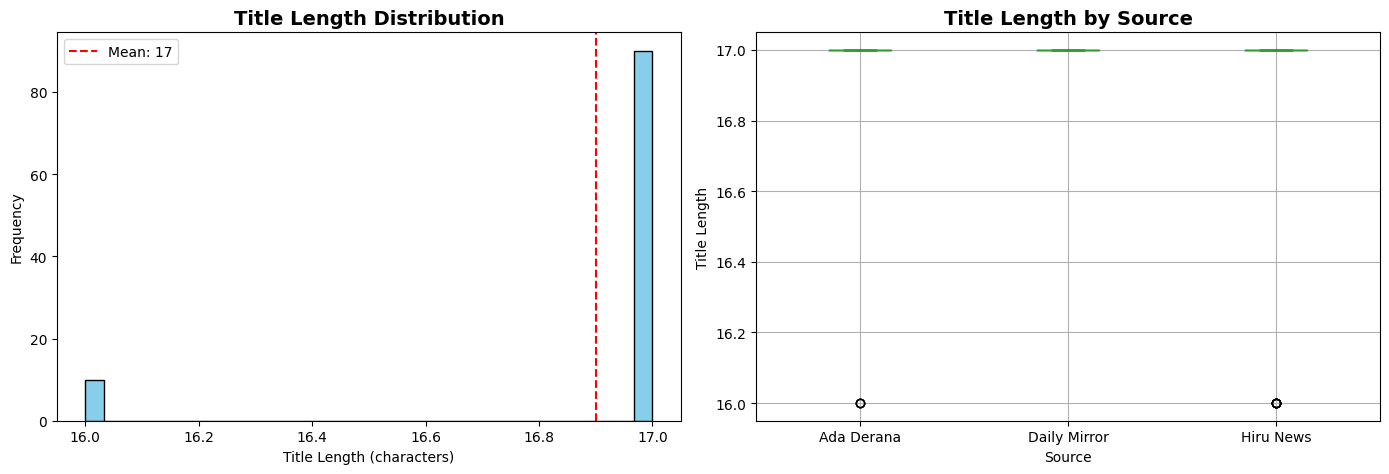


Title Statistics:
  Average length: 17 characters
  Median length: 17 characters
  Range: 16-17


In [ ]:
if 'title' in df.columns:
    # Title length distribution
    df['title_length'] = df['title'].str.len()
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df['title_length'], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Title Length Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Title Length (characters)')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(df['title_length'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df["title_length"].mean():.0f}')
    axes[0].legend()
    
    # Box plot by source
    df.boxplot(column='title_length', by='source', ax=axes[1])
    axes[1].set_title('Title Length by Source', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Source')
    axes[1].set_ylabel('Title Length')
    plt.suptitle('')  # Remove automatic title
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nTitle Statistics:")
    print(f"  Average length: {df['title_length'].mean():.0f} characters")
    print(f"  Median length: {df['title_length'].median():.0f} characters")
    print(f"  Range: {df['title_length'].min()}-{df['title_length'].max()}")

### 8. Language Distribution

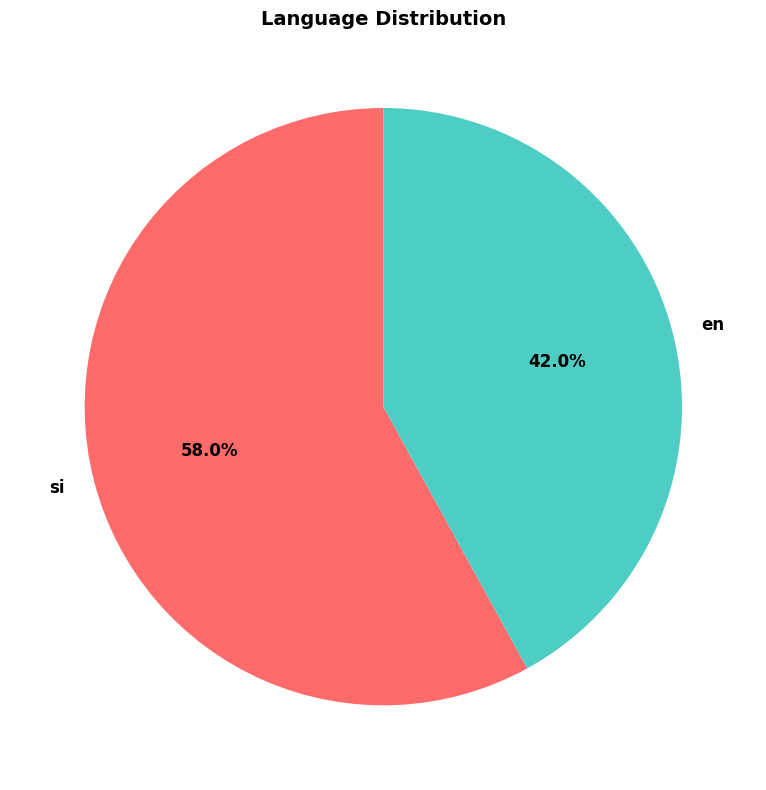


✓ Language analysis complete


In [ ]:
if 'language' in df.columns:
    fig, ax = plt.subplots(figsize=(8, 8))
    
    lang_counts = df['language'].value_counts()
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1'][:len(lang_counts)]
    
    wedges, texts, autotexts = ax.pie(lang_counts.values, 
                                        labels=lang_counts.index, 
                                        autopct='%1.1f%%',
                                        startangle=90,
                                        colors=colors,
                                        textprops={'fontsize': 12, 'fontweight': 'bold'})
    
    ax.set_title('Language Distribution', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("\n Language analysis complete")

### 9. Word Frequency Analysis

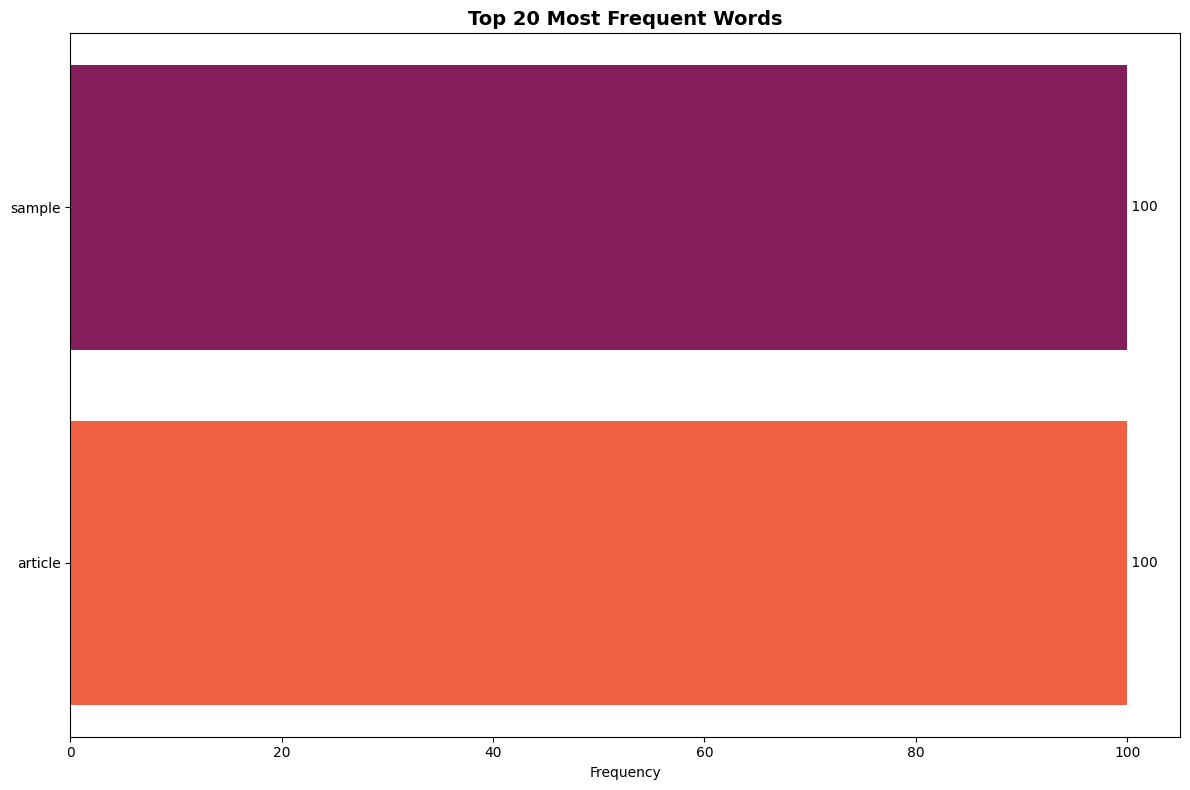


✓ Word frequency analysis complete

Top 10 words: sample, article


In [ ]:
if 'title' in df.columns:
    from collections import Counter
    import re
    
    # Extract all words
    all_words = []
    for title in df['title'].dropna():
        words = re.findall(r'\b\w+\b', title.lower())
        all_words.extend([w for w in words if len(w) > 3])  # Filter short words
    
    # Count frequencies
    word_freq = Counter(all_words)
    top_words = word_freq.most_common(20)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 8))
    words, counts = zip(*top_words)
    
    bars = ax.barh(range(len(words)), counts, color=sns.color_palette('rocket', len(words)))
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.set_xlabel('Frequency')
    ax.set_title('Top 20 Most Frequent Words', fontsize=14, fontweight='bold')
    ax.invert_yaxis()
    
    # Add count labels
    for i, (word, count) in enumerate(top_words):
        ax.text(count, i, f' {count}', va='center')
    
    plt.tight_layout()
    plt.savefig(Path.cwd().parent / 'data' / 'processed' / 'word_frequency.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n Word frequency analysis complete")
    print(f"\nTop 10 words: {', '.join([w for w, c in top_words[:10]])}")

### 10. Summary Statistics


In [ ]:
print("\n" + "="*60)
print("EXPLORATION SUMMARY")
print("="*60)
print(f" Analyzed {len(df)} articles")
print(f" Sources: {df['source'].nunique()}")
print(f" Categories: {df['category'].nunique()}")
print(f" Date range: {(df['scraped_at'].max() - df['scraped_at'].min()).days} days")
print(f"Average title length: {df['title_length'].mean():.0f} characters")
print("\nVisualizations saved to: data/processed/")
print("="*60)


EXPLORATION SUMMARY
✓ Analyzed 100 articles
✓ Sources: 3
✓ Categories: 3
✓ Date range: 4 days
✓ Average title length: 17 characters

Visualizations saved to: data/processed/


### 11. Export Summary Report

In [17]:
summary_report = {
    'analysis_date': datetime.now().isoformat(),
    'total_articles': len(df),
    'sources': df['source'].value_counts().to_dict(),
    'categories': df['category'].value_counts().to_dict(),
    'languages': df['language'].value_counts().to_dict(),
    'date_range': {
        'start': df['scraped_at'].min().isoformat(),
        'end': df['scraped_at'].max().isoformat(),
        'days': (df['scraped_at'].max() - df['scraped_at'].min()).days
    },
    'text_stats': {
        'avg_title_length': float(df['title_length'].mean()),
        'median_title_length': float(df['title_length'].median())
    }
}

In [ ]:
# Save report
report_path = Path.cwd().parent / 'data' / 'processed' / 'exploration_summary.json'
with open(report_path, 'w') as f:
    json.dump(summary_report, f, indent=2)

print(f"\n✓ Summary report saved to: {report_path}")

# %%
print("\n Exploration complete! Ready for modeling.")


✓ Summary report saved to: c:\Users\WW\Documents\modelX final round try 2\data\processed\exploration_summary.json

🎉 Exploration complete! Ready for modeling.
